In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings


warnings.filterwarnings('ignore')

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression



In [50]:
df= pd.read_csv('/content/gold_monthly_csv (1).csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [49]:
df.shape


(847, 2)

In [51]:
print(f"Date range of gold prices available from- {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from- 1950-01 to 2020-07


In [52]:
date =pd.date_range(start='1/1/1950',end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [53]:
df['month']= date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


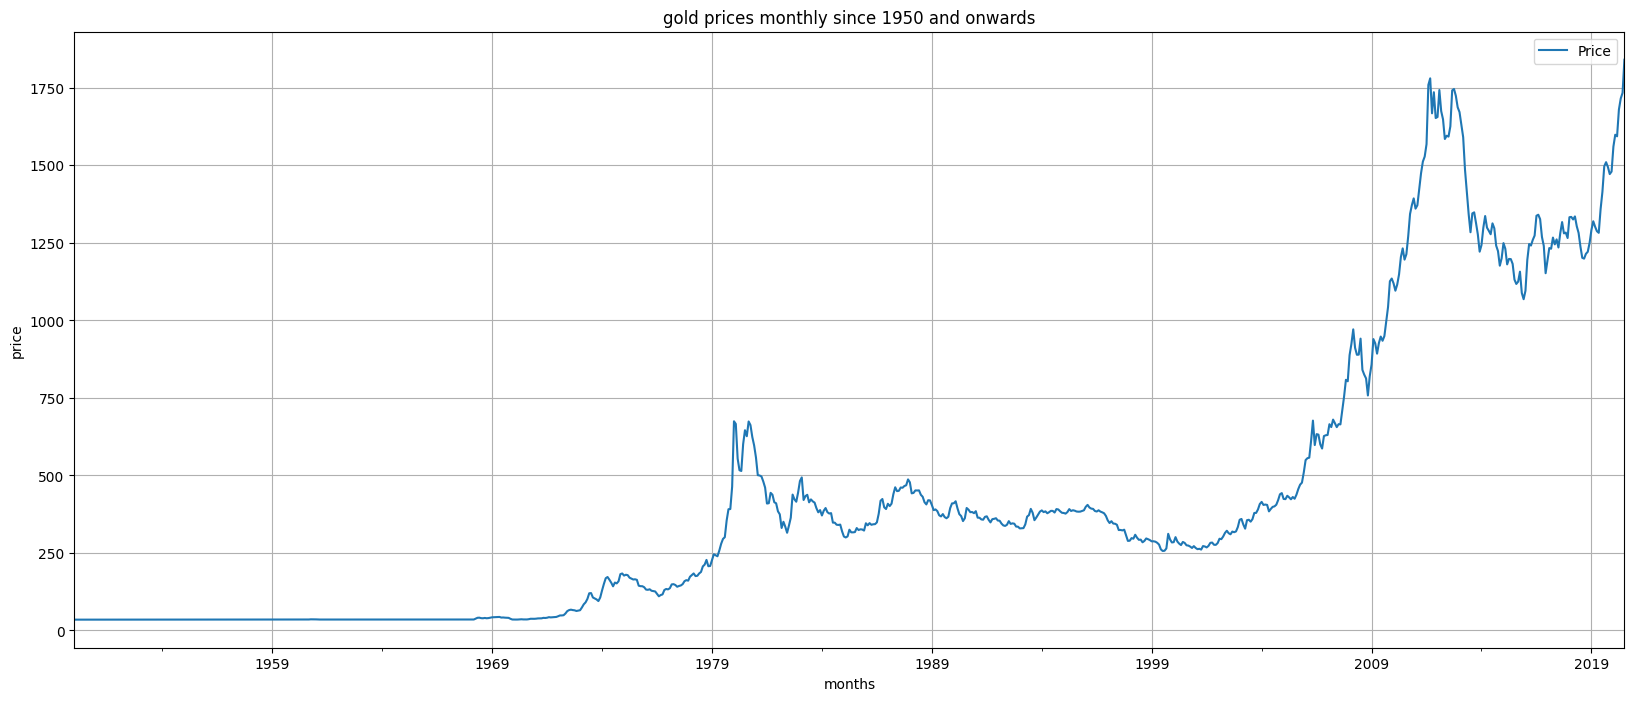

In [54]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel("months")
plt.ylabel("price")
plt.grid();

In [55]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


<function matplotlib.pyplot.show(close=None, block=None)>

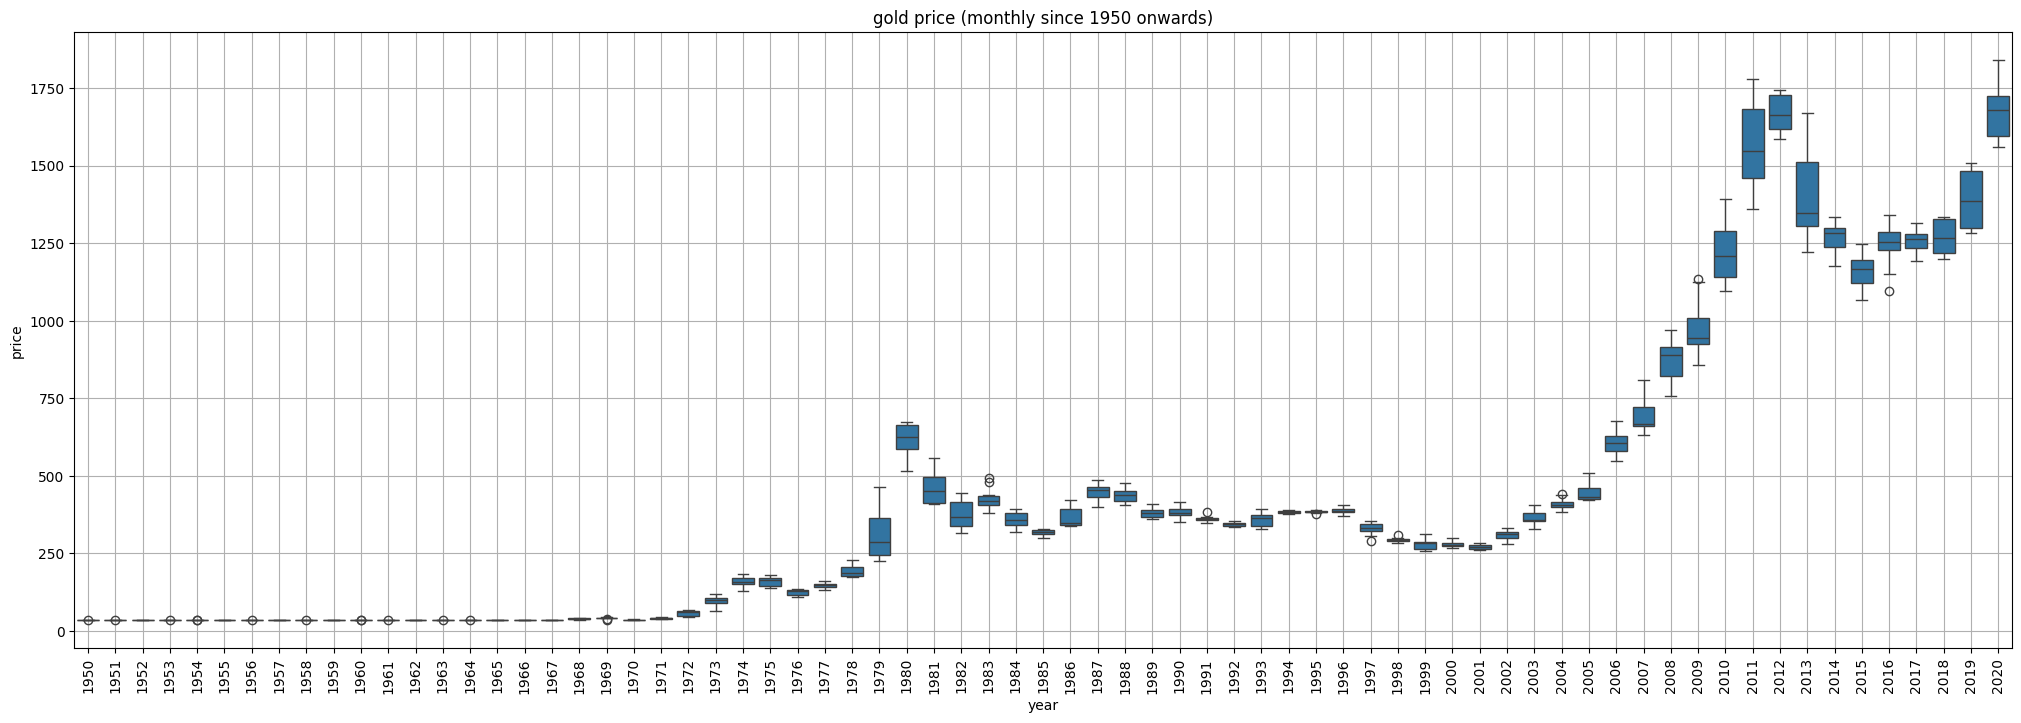

In [61]:
_, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.title('gold price (monthly since 1950 onwards)')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid();
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

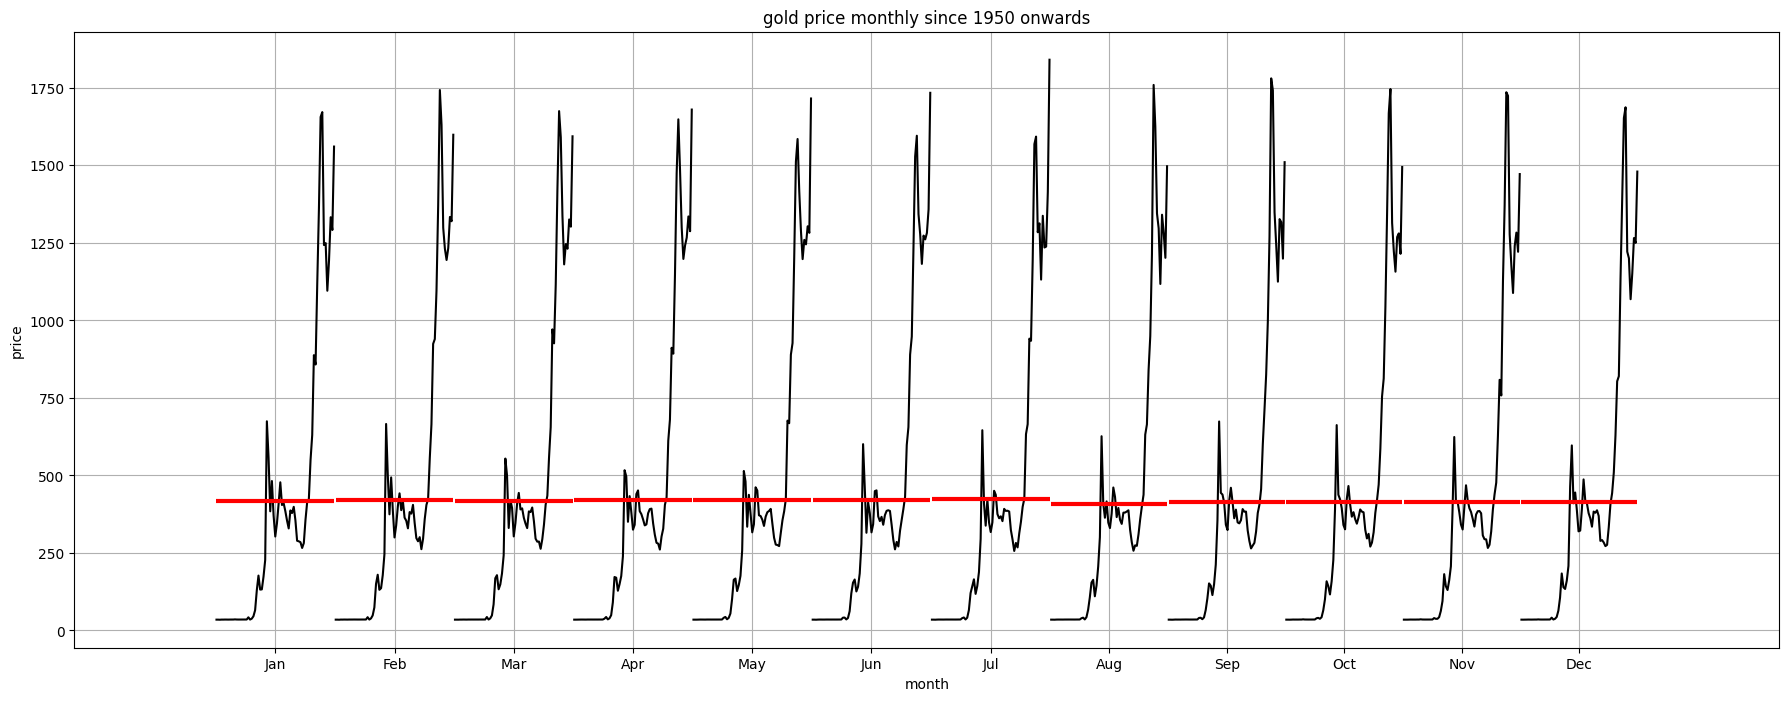

In [64]:
from statsmodels.graphics.tsaplots import month_plot

fig,ax = plt.subplots(figsize=(22,8))
month_plot(df,ylabel='gold price', ax=ax)

plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

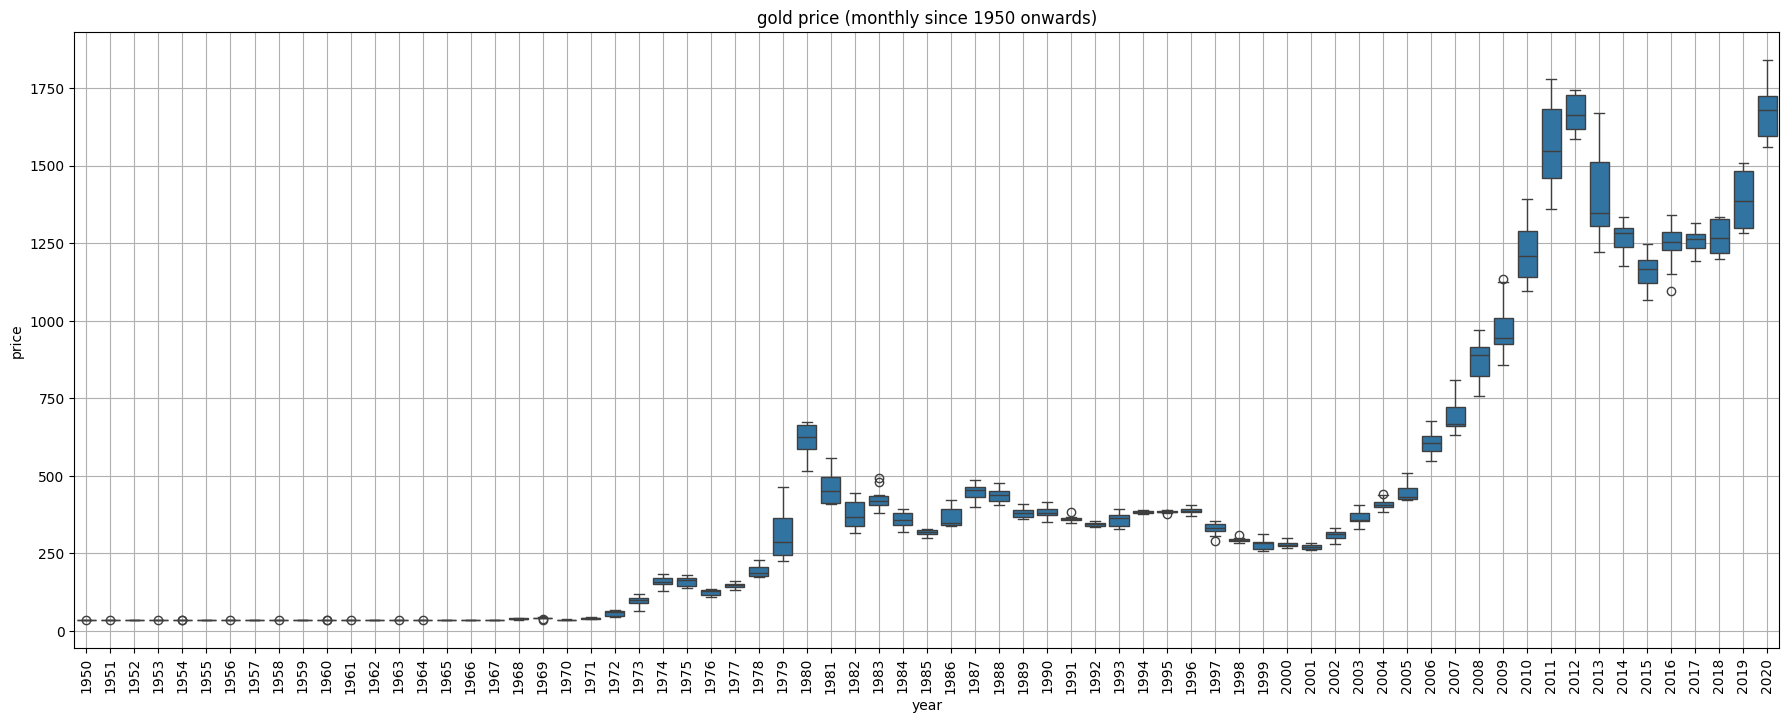

In [67]:
_, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df.index.year,y=df.values[:,0],ax=ax)
plt.grid()
plt.xlabel('year')
plt.ylabel('price')
plt.title('gold price (monthly since 1950 onwards)')
plt.xticks(rotation=90)
plt.show

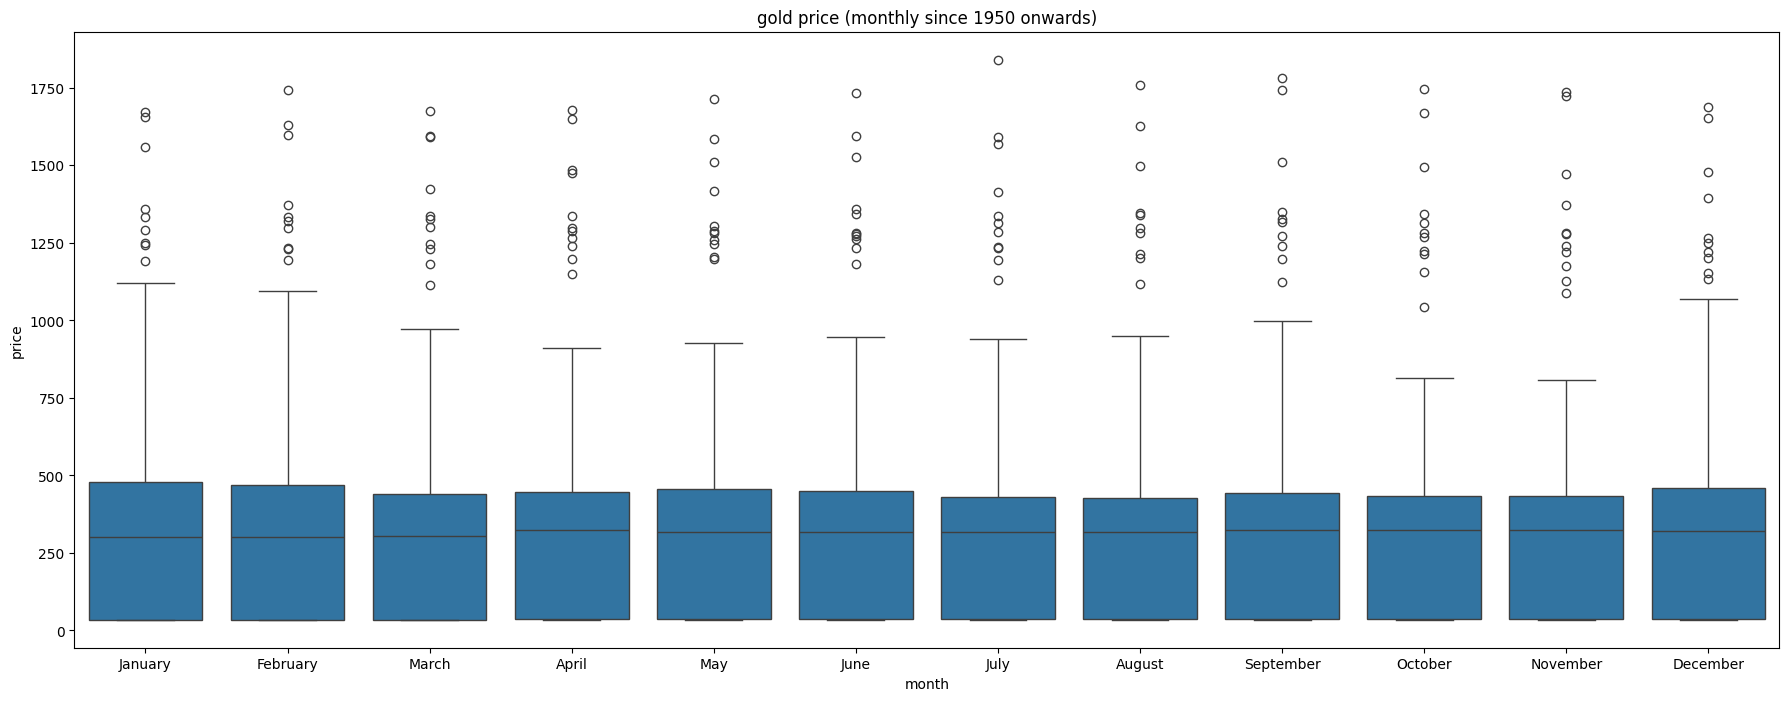

In [71]:
_, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.xlabel("month")
plt.ylabel('price')
plt.title('gold price (monthly since 1950 onwards)')

plt.show();

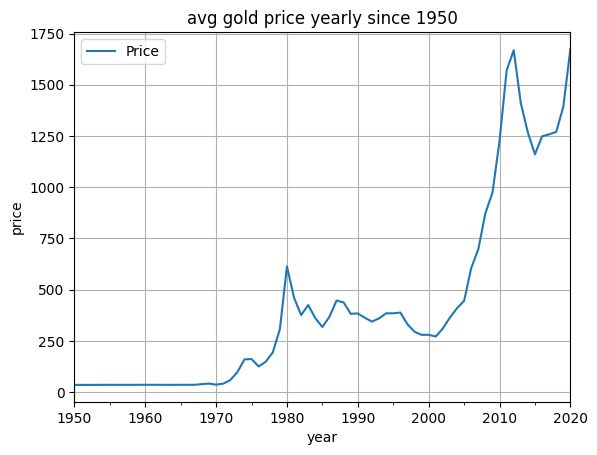

In [73]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("avg gold price yearly since 1950")
plt.xlabel("year")
plt.ylabel("price")
plt.grid();

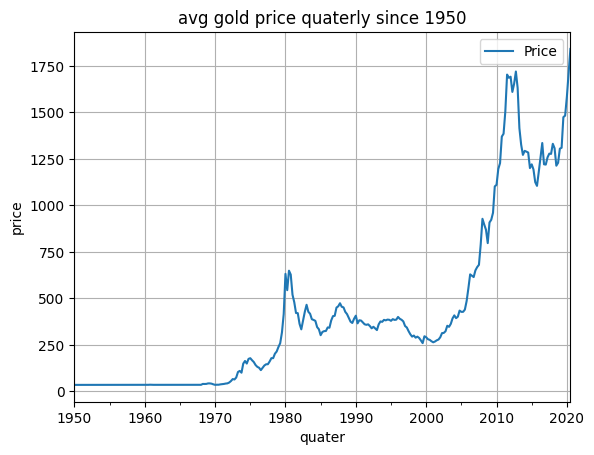

In [74]:
df.quaterly_sum= df.resample('Q').mean()
df.quaterly_sum.plot();
plt.title("avg gold price quaterly since 1950")
plt.xlabel("quater")
plt.ylabel("price")
plt.grid();

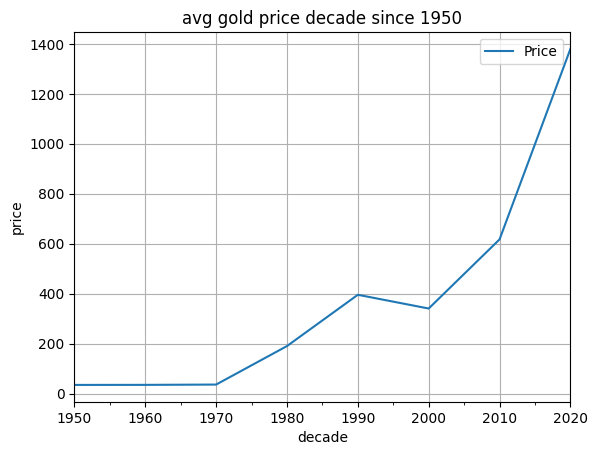

In [75]:
df_decade_sum = df.resample('10A').mean()
df_decade_sum.plot();
plt.title("avg gold price decade since 1950")
plt.xlabel("decade")
plt.ylabel("price")
plt.grid();

In [77]:
# Calculate the standard deviation of the gold price for each year
df_1['std'] = df.groupby(df.index.year)['Price'].std()

# Calculate the coefficient of variation
df_1['Cov_pct'] = ((df_1['std'] / df_1["Mean"]) * 100).round(2)

# Display the first five rows of the DataFrame
df_1.head()

,Mean,Min,std,Cov_pct
month,,,,
1950,34.729167,34.72,0.002887,0.01
1951,34.717500,34.66,0.020057,0.06
1952,34.628333,34.49,0.117538,0.34
1953,34.879167,34.76,0.056481,0.16
1954,35.020000,34.86,0.082792,0.24


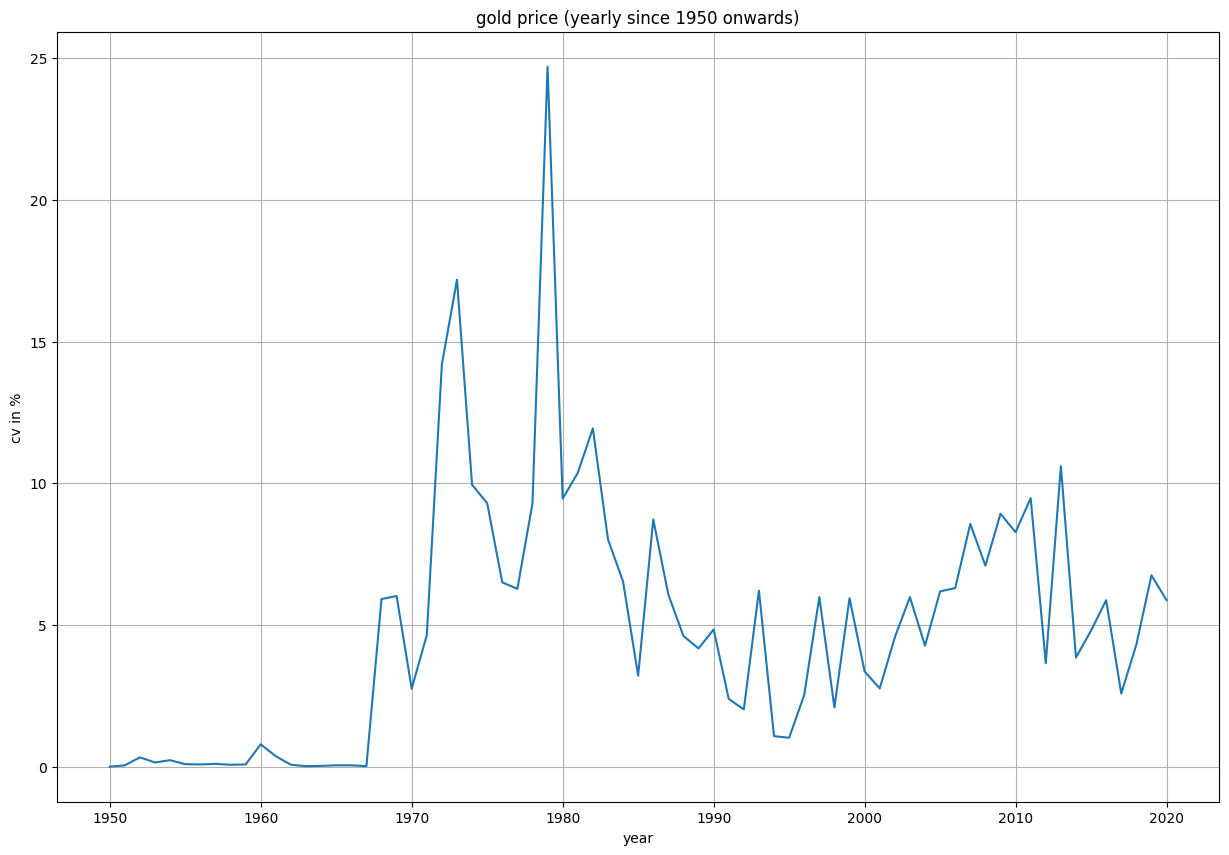

In [79]:
fig,ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot();
plt.title("gold price (yearly since 1950 onwards)")
plt.xlabel("year")
plt.ylabel("cv in %")
plt.grid();


In [80]:
train =df[df.index.year <= 2015]
test = df[df.index.year > 2015]


In [83]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


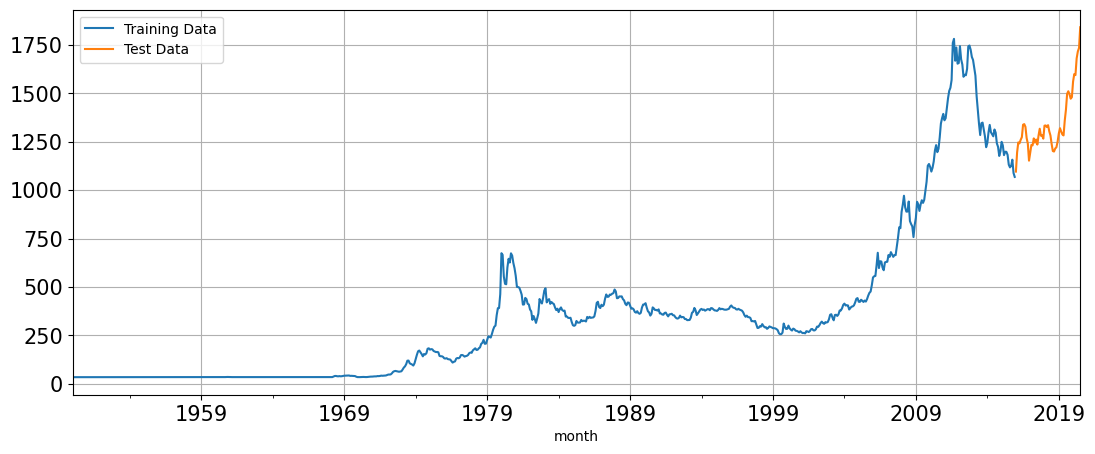

In [85]:
train["Price"].plot(figsize=(13,5),fontsize=15)
test["Price"].plot(figsize=(13,5),fontsize=15)
plt.grid();
plt.legend(['Training Data','Test Data'])
plt.show()

In [86]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [87]:
LR_train = train.copy()
LR_test= test.copy()

In [89]:
LR_train['time']=train_time
LR_test['time']=test_time

In [91]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'])

LinearRegression()

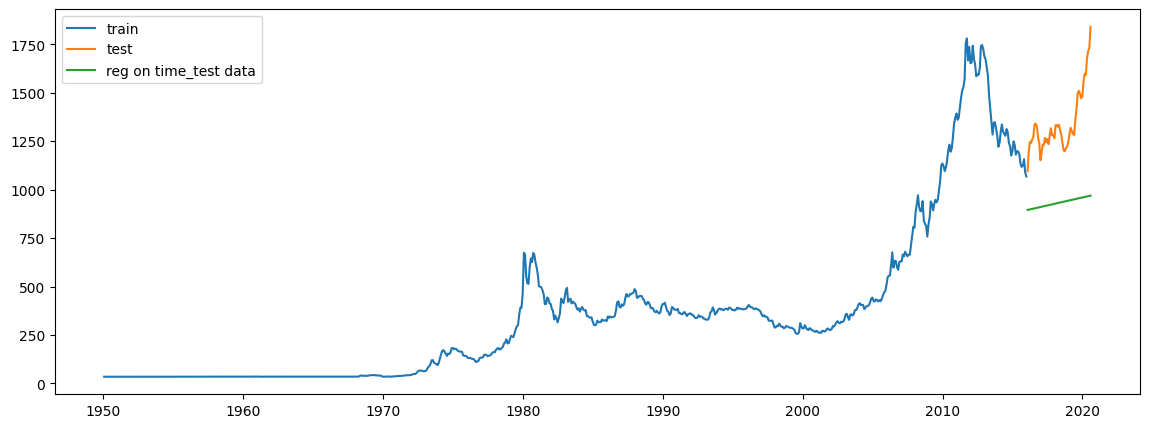

In [94]:
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast']=test_predictions_model1

plt.figure(figsize=(14,5))
plt.plot(train['Price'],label='train')
plt.plot();
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forecast'],label='reg on time_test data')
plt.legend(loc='upper left')
plt.show()

In [97]:
def mape(actual,pred):
  return round((np.mean(np.abs((actual-pred)/actual))*100),2)

In [103]:
mape_model1_test=mape(test["Price"].values,test_predictions_model1);
print("MAPE is %3.3f"%(mape_model1_test),"%");

MAPE is 29.760 %


In [107]:
results=pd.DataFrame({'Test Mape(%): ': [mape_model1_test]},index=["RegressionOnTime"])
results

,Test Mape(%):
RegressionOnTime,29.76


In [108]:
Naive_train=train.copy()
Naive_test=test.copy()

In [111]:
Naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test.head()

,Price,naive
month,,
2016-01-31,1095.655,1068.317
2016-02-29,1194.893,1068.317
2016-03-31,1246.312,1068.317
2016-04-30,1241.452,1068.317
2016-05-31,1259.755,1068.317


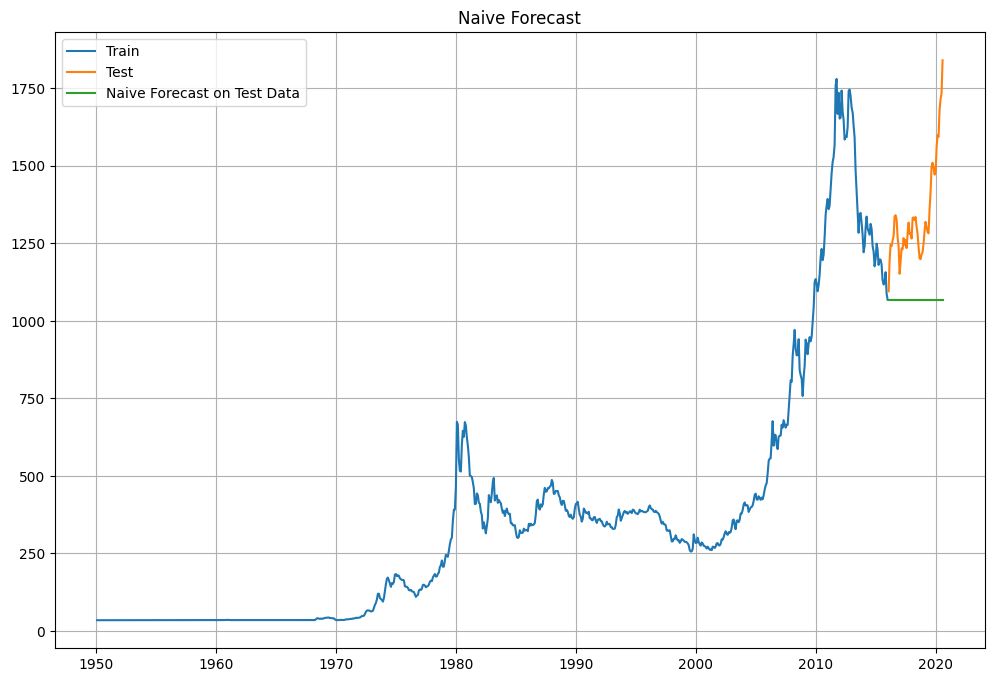

In [112]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(Naive_test['naive'],label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();
plt.show();

In [113]:
mape_model2_test=mape(test["Price"].values,Naive_test['naive'].values);
print("MAPE is %3.3f"%(mape_model2_test),"%");

MAPE is 19.380 %


In [117]:
resultsDf_2 = pd.DataFrame({'Test MAPE(%): ': [mape_model2_test]},index=["NaiveModel"])
results = pd.concat([results,resultsDf_2]final_model)
results

,Test Mape(%):,Test MAPE(%):
RegressionOnTime,29.76,NaN
NaiveModel,NaN,19.38


In [118]:
final_model = ExponentialSmoothing(df,
                                   trend='additive',
                                   seasonal='additive').fit(smoothing_level=0.4,
                                                            smoothing_trend=0.3,
                                                            smoothing_seasonal=0.6)

In [122]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [123]:
predictions = final_model.forecast(steps=len(test))

In [125]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Extract the prediction from the final model.
prediction = final_model.forecast(steps=len(test))

# Create the DataFrame with the desired columns.
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid, ddof=1),
                       'prediction': prediction,
                       'upper_CI': prediction + 1.96*np.std(final_model.resid, ddof=1)})

# Print the DataFrame.
print(pred_df)

               lower_CI   prediction     upper_CI
2020-08-31  1684.720065  1792.871037  1901.022009
2020-09-30  1615.306077  1723.457050  1831.608022
2020-10-31  1538.567922  1646.718895  1754.869867
2020-11-30  1476.758600  1584.909572  1693.060545
2020-12-31  1459.327290  1567.478262  1675.629235
2021-01-31  1514.417601  1622.568574  1730.719546
2021-02-28  1545.352396  1653.503369  1761.654341
2021-03-31  1556.764378  1664.915350  1773.066323
2021-04-30  1648.309829  1756.460802  1864.611774
2021-05-31  1694.225915  1802.376887  1910.527859
2021-06-30  1743.402088  1851.553061  1959.704033
2021-07-31  1796.108352  1904.259324  2012.410297
2021-08-31  1785.037437  1893.188409  2001.339381
2021-09-30  1715.623449  1823.774422  1931.925394
2021-10-31  1638.885294  1747.036267  1855.187239
2021-11-30  1577.075972  1685.226944  1793.377917
2021-12-31  1559.644662  1667.795634  1775.946607
2022-01-31  1614.734973  1722.885946  1831.036918
2022-02-28  1645.669768  1753.820741  1861.971713


**FINAL GRAPH OF GOLD PRICE CHANGE WITH TIME FORECAST**

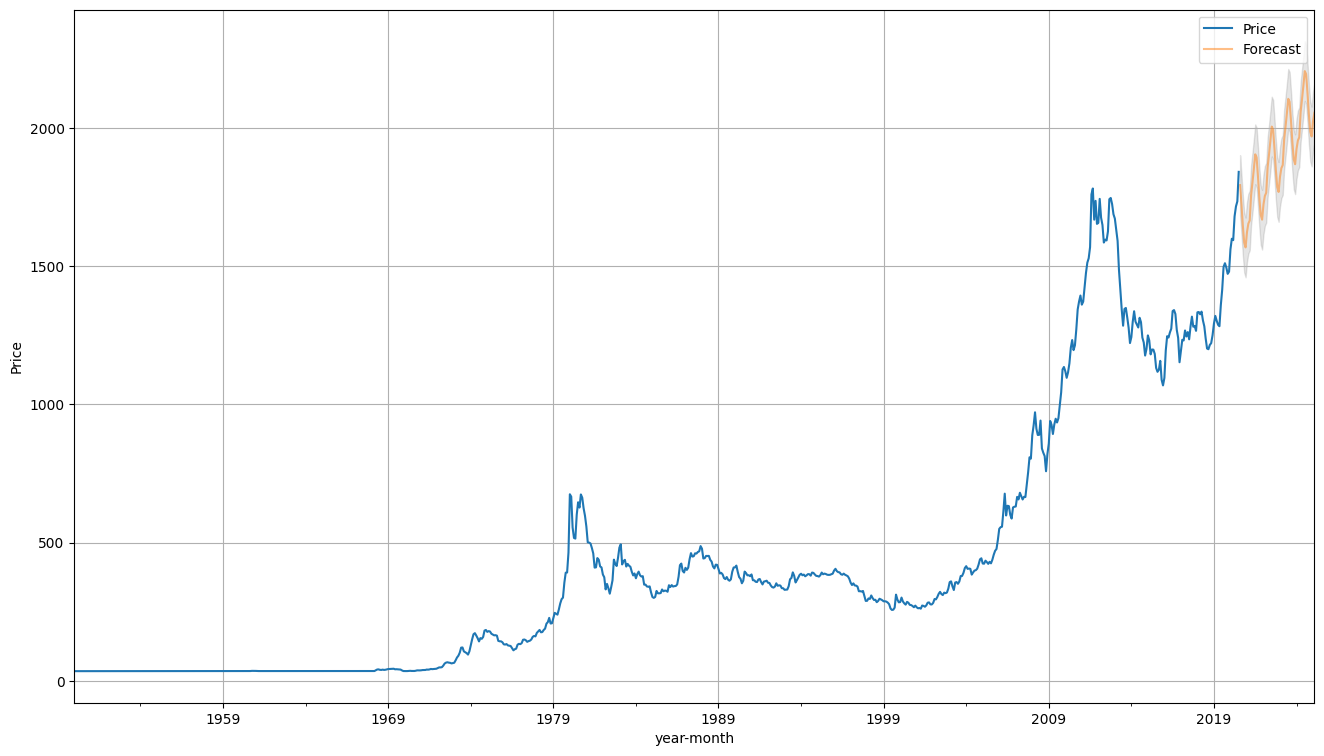

In [134]:
axis= df.plot(label='Actual',figsize=(16,9))
pred_df['prediction'].plot(ax=axis,label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index,
                 pred_df['lower_CI'],
                 pred_df['upper_CI'],
                 color='k',
                 alpha=0.1)

axis.set_xlabel('year-month')
axis.set_ylabel('Price')
axis.legend(loc='best')
plt.grid();
plt.show()